### 1. Installed the necessary libraries from the requirements.txt file into the corresponding virtual environment.

### 2. Started a new notebook in JupyterLab and imported all the necessary libraries. 

In [1]:
import time
import logging
import csv
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
import requests

In [3]:
import pandas as pd

### 3. Loaded the 20th-century data that was scraped in Exercise 1.4. 

In [13]:
df = pd.read_csv(r'P:\CarrerFoundy\Data Visualizations with Python\Exercise 1.5\20th_century_scrape.txt', sep='\t')



### 4. Tokenize the words from the text and create a bar chart to plot the 10 most common words.

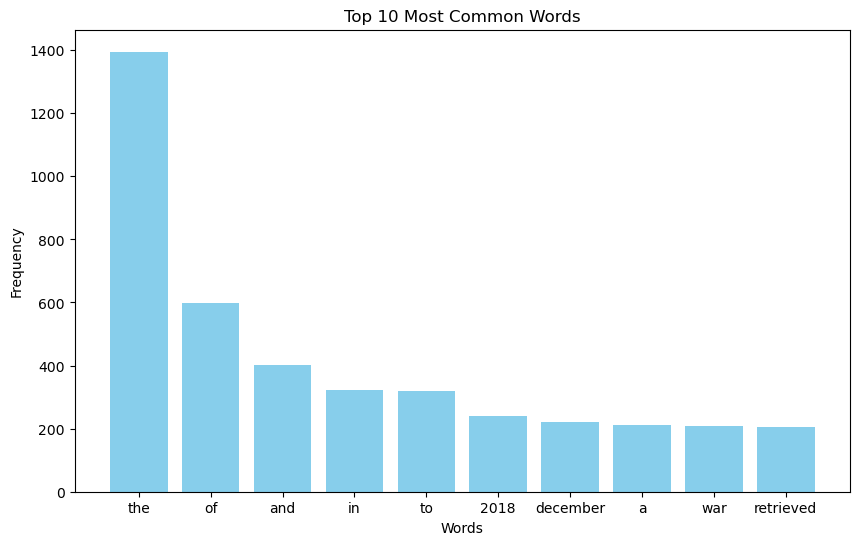

In [15]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import re

# Read the text file
with open(r'P:\CarrerFoundy\Data Visualizations with Python\Exercise 1.5\20th_century_scrape.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Tokenize the words using regex to split by non-word characters
words = re.findall(r'\b\w+\b', text.lower())

# Count the frequency of each word
word_counts = Counter(words)

# Get the 10 most common words
most_common_words = word_counts.most_common(10)

# Separate the words and their counts for plotting
words, counts = zip(*most_common_words)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


### 5. Removed stop words, and rerun the plot.

In [17]:
import nltk
from nltk.corpus import stopwords

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sojan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

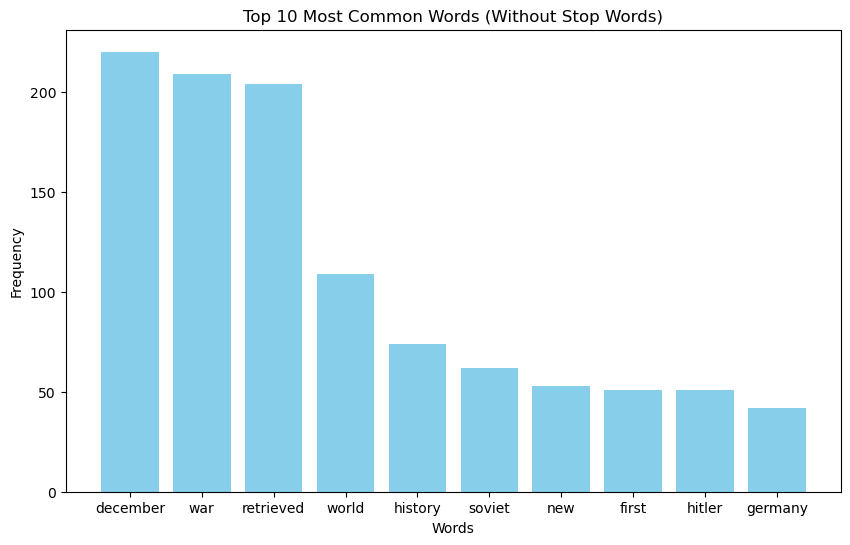

In [73]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords

# Read the text file
with open(r'P:\CarrerFoundy\Data Visualizations with Python\Exercise 1.5\20th_century_scrape.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Tokenize the words using regex to split by non-word characters and convert to lowercase
words = re.findall(r'\b\w+\b', text.lower())


# Remove stop words and punctuation
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words and word.isalpha()]

# Count the frequency of each word
word_counts = Counter(filtered_words)

# Get the 10 most common words (or as many as are available)
most_common_words = word_counts.most_common(10)

# Separate the words and their counts for plotting
if most_common_words:  # Ensure we have words to plot
    words, counts = zip(*most_common_words)

    # Create the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts, color='skyblue')
    plt.title('Top 10 Most Common Words (Without Stop Words)')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Not enough unique words to plot.")


### Impressions After Removing Stop Words
After removing stop words, the plot now highlights the more meaningful words that provide better insights into 
the main themes or subjects of the text. Common functional words like 'the', 'and', 'is' are removed, allowing
content-specific terms to stand out. This change makes the word frequency analysis more informative for 
understanding the core content of the text.


### 6. Created a tags list using TextBlob. 

In [59]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sojan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sojan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [60]:
from textblob import TextBlob

# Read the text file
with open(r'P:\CarrerFoundy\Data Visualizations with Python\Exercise 1.5\countries_list_20th_century_1.5.csv', 'r', encoding='utf-8') as file:
    # Make sure the code inside 'with' is indented correctly
    text = file.read()

# Create a TextBlob object
blob = TextBlob(text)

# Create a list of tags (word, POS tag)
tags = blob.tags

# Display the tags
print(tags[:20])  # Print first 20 tags for inspection


[('country_name', 'NN'), ('1', 'CD'), ('Afghanistan', 'NNP'), ('2', 'CD'), ('Albania', 'NNP'), ('3', 'CD'), ('Algeria', 'NNP'), ('4', 'CD'), ('Andorra', 'NNP'), ('5', 'CD'), ('Angola', 'NNP'), ('6', 'CD'), ('Antigua', 'NNP'), ('and', 'CC'), ('Barbuda', 'NNP'), ('7', 'CD'), ('Argentina', 'NNP'), ('8', 'CD'), ('Armenia', 'NNP'), ('9', 'CD')]


### 7. Created a list of the Top 10 POS tags for words that appear in the article. 

In [67]:
from textblob import TextBlob
from collections import Counter

# Read the text file
with open(r'P:\CarrerFoundy\Data Visualizations with Python\Exercise 1.5\countries_list_20th_century_1.5.csv', 'r', encoding='utf-8') as file:
    text = file.read()

# Create a TextBlob object
blob = TextBlob(text)

# Get POS tags
tags = blob.tags

# Count the frequency of each POS tag
tag_counts = Counter(tag for word, tag in tags)

# Get the 10 most common POS tags
most_common_tags = tag_counts.most_common(10)

# Display the top 10 POS tags
print("Top 10 POS Tags:")
for tag, count in most_common_tags:
    print(f"{tag}: {count}")


Top 10 POS Tags:
NNP: 258
CD: 209
CC: 6
DT: 5
IN: 4
VBZ: 4
POS: 3
NNPS: 3
NN: 1
JJ: 1


### 8. Ploted this list in a bar chart using the seaborn library.

C:\Users\sojan\AppData\Local\Temp\ipykernel_11536\1198987245.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(tags), y=list(counts), palette='Blues_d')


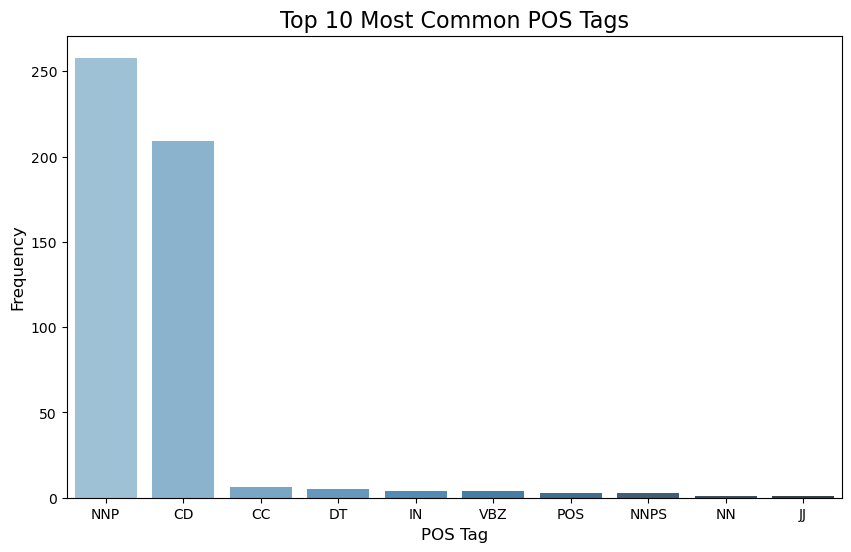

In [75]:


# Create a Seaborn bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(tags), y=list(counts), palette='Blues_d')

# Add titles and labels
plt.title('Top 10 Most Common POS Tags', fontsize=16)
plt.xlabel('POS Tag', fontsize=12)import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from collections import Counter

# Read the text file
with open(r'P:\CarrerFoundy\Data Visualizations with Python\Exercise 1.5\countries_list_20th_century_1.5.csv', 'r', encoding='utf-8') as file:
    text = file.read()

# Create a TextBlob object
blob = TextBlob(text)

# Get POS tags
tags = blob.tags

# Count the frequency of each POS tag
tag_counts = Counter(tag for word, tag in tags)

# Get the 10 most common POS tags
most_common_tags = tag_counts.most_common(10)

# Separate the tags and their counts for plotting
tags, counts = zip(*most_common_tags)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()



### 9. Created three bar plots with the top 15 POS labels.

C:\Users\sojan\AppData\Local\Temp\ipykernel_11536\1396968132.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=noun_df, x='Frequency', y='Word', palette='Blues_d')
C:\Users\sojan\AppData\Local\Temp\ipykernel_11536\1396968132.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=verb_df, x='Frequency', y='Word', palette='Greens_d')
C:\Users\sojan\AppData\Local\Temp\ipykernel_11536\1396968132.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=adjective_df, x='Frequency', y='Word', palette='Reds_d')


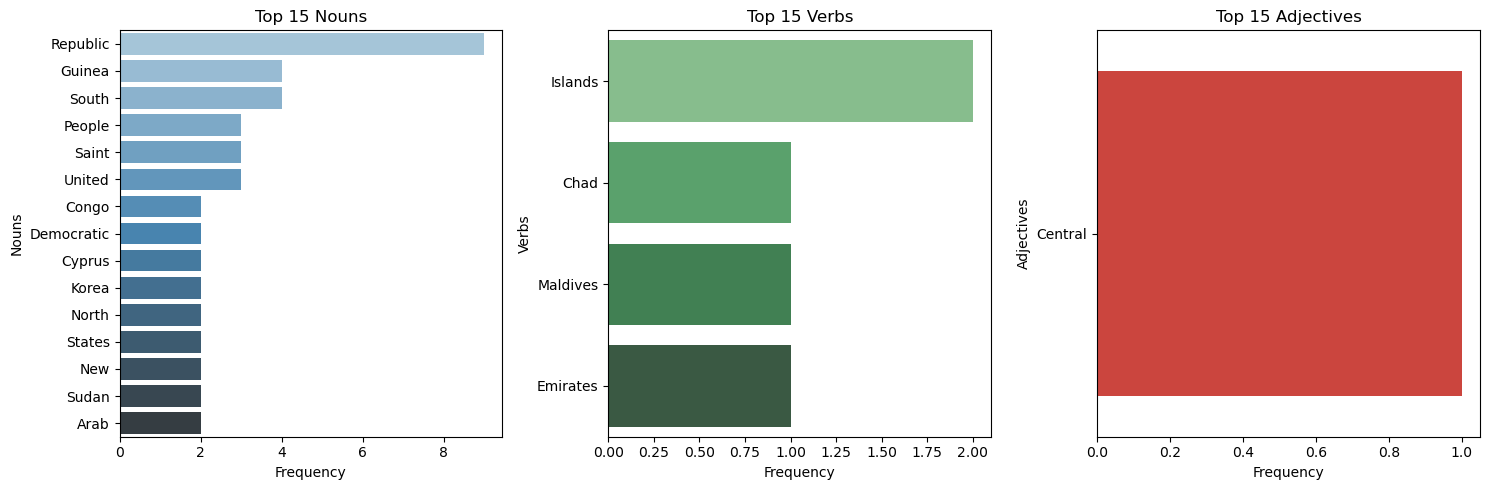

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from collections import Counter

# Read the text file
with open(r'P:\CarrerFoundy\Data Visualizations with Python\Exercise 1.5\countries_list_20th_century_1.5.csv', 'r', encoding='utf-8') as file:
    text = file.read()

# Create a TextBlob object
blob = TextBlob(text)

# Get POS tags
tags = blob.tags

# Filter tags for nouns, verbs, and adjectives
nouns = [word for word, pos in tags if pos.startswith('NN')]
verbs = [word for word, pos in tags if pos.startswith('VB')]
adjectives = [word for word, pos in tags if pos.startswith('JJ')]

# Count the frequency of each type
noun_counts = Counter(nouns).most_common(15)
verb_counts = Counter(verbs).most_common(15)
adjective_counts = Counter(adjectives).most_common(15)

# Create DataFrames for each
noun_df = pd.DataFrame(noun_counts, columns=['Word', 'Frequency'])
verb_df = pd.DataFrame(verb_counts, columns=['Word', 'Frequency'])
adjective_df = pd.DataFrame(adjective_counts, columns=['Word', 'Frequency'])

# Plotting
plt.figure(figsize=(15, 5))

# Noun plot
plt.subplot(1, 3, 1)
sns.barplot(data=noun_df, x='Frequency', y='Word', palette='Blues_d')
plt.title('Top 15 Nouns')
plt.xlabel('Frequency')
plt.ylabel('Nouns')

# Verb plot
plt.subplot(1, 3, 2)
sns.barplot(data=verb_df, x='Frequency', y='Word', palette='Greens_d')
plt.title('Top 15 Verbs')
plt.xlabel('Frequency')
plt.ylabel('Verbs')

# Adjective plot
plt.subplot(1, 3, 3)
sns.barplot(data=adjective_df, x='Frequency', y='Word', palette='Reds_d')
plt.title('Top 15 Adjectives')
plt.xlabel('Frequency')
plt.ylabel('Adjectives')

plt.tight_layout()
plt.show()


### Analysis of POS Frequencies

1. **Nouns**: The top nouns in the text are significantly more frequent, showing a concentration on specific subjects or objects. This suggests that the text may focus on particular topics or entities.
   
2. **Verbs**: The verbs are fewer, and their frequencies drop quickly after the top few. This indicates that the text might repeatedly use a small set of actions or verbs, which is common in specific types of texts or descriptions.

3. **Adjectives**: The adjectives are even less frequent and more evenly distributed. This might imply that descriptive language is less varied or less emphasized in the text compared to nouns and verbs.

Overall, the distribution shows that nouns dominate the text, which is typical as they carry the main content load. Verbs are fewer, focusing on essential actions, and adjectives add descriptive elements but are used less frequently.


### 10.Created a dataframe with the countries and the number of times they’re mentioned.

In [24]:
import pandas as pd

countries_list = [
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", "Argentina", "Armenia",
    "Australia", "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium",
    "Belize", "Benin", "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei", "Bulgaria",
    "Burkina Faso", "Burundi", "Cambodia", "Cameroon", "Canada", "Cape Verde", "Central African Republic", 
    "Chad", "Chile", "China", "People's Republic of Colombia", "Comoros", "Congo", "Democratic Republic of the Congo",
    "Republic of Costa Rica", "Croatia", "Cuba", "Cyprus", "Czech Republic", "Denmark", "Djibouti", "Dominica", 
    "Dominican Republic", "East Timor", "Ecuador", "Egypt", "El Salvador", "Equatorial Guinea", "Eritrea", 
    "Estonia", "Eswatini", "Ethiopia", "Fiji", "Finland", "France", "Gabon", "Gambia", "Georgia", "Germany", 
    "Ghana", "Greece", "Grenada", "Guatemala", "Guinea", "Guinea-Bissau", "Guyana", "Haiti", "Honduras", 
    "Hungary", "Iceland", "India", "Indonesia", "Iran", "Iraq", "Ireland", "Israel", "Italy", "Ivory Coast", 
    "Jamaica", "Japan", "Jordan", "Kazakhstan", "Kenya", "Kiribati", "Korea", "North Korea", "South Korea", 
    "Kuwait", "Kyrgyzstan", "Laos", "Latvia", "Lebanon", "Lesotho", "Liberia", "Libya", "Liechtenstein", 
    "Lithuania", "Luxembourg", "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali", "Malta", "Marshall Islands", 
    "Mauritania", "Mauritius", "Mexico", "Micronesia", "Federated States of Moldova", "Monaco", "Mongolia", 
    "Montenegro", "Morocco", "Mozambique", "Myanmar", "Namibia", "Nauru", "Nepal", "Netherlands", 
    "New Zealand", "Nicaragua", "Niger", "Nigeria", "North Macedonia", "Norway", "Oman", "Pakistan", 
    "Palau", "Palestine", "Panama", "Papua New Guinea", "Paraguay", "Peru", "Philippines", "Poland", "Portugal", 
    "Qatar", "Romania", "Russia", "Rwanda", "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines", 
    "Samoa", "San Marino", "SÃ£o TomÃ© and PrÃ­ncipe", "Saudi Arabia", "Senegal", "Serbia", "Seychelles", 
    "Sierra Leone", "Singapore", "Slovakia", "Slovenia", "Solomon Islands", "Somalia", "South Africa", "South Sudan", 
    "Spain", "Sri Lanka", "Sudan", "Suriname", "Sweden", "Switzerland", "Syria", "Tajikistan", "Tanzania", 
    "Thailand", "Togo", "Tonga", "Trinidad and Tobago", "Tunisia", "Turkey", "Turkmenistan", "Tuvalu", 
    "Uganda", "Ukraine", "United Arab Emirates", "United Kingdom", "United States", "Uruguay", "Uzbekistan", 
    "Vanuatu", "Vatican City (Holy See)", "Venezuela", "Vietnam", "Yemen", "Zambia", "Zimbabwe", "Abkhazia", 
    "Artsakh", "Cook Islands", "Donetsk People's Republic", "Kosovo", "Luhansk People's Republic", "Niue", 
    "Northern Cyprus", "Sahrawi Arab Democratic Republic", "Somaliland", "South Ossetia", "Taiwan", "Transnistria"
]

# Read the text file
with open(r'P:\CarrerFoundy\Data Visualizations with Python\Exercise 1.5\countries_list_20th_century_1.5.csv', 'r', encoding='utf-8') as file:
    text = file.read()

# Convert the text to lowercase for case-insensitive matching
text_lower = text.lower()

# Count the occurrences of each country in the text
country_counts = {country: text_lower.count(country.lower()) for country in countries_list}

# Create a DataFrame
countries_df = pd.DataFrame(list(country_counts.items()), columns=['Country', 'Mentions'])

# Sort the DataFrame by mentions in descending order
countries_df.sort_values(by='Mentions', ascending=False, inplace=True)

# Reset the index
countries_df.reset_index(drop=True, inplace=True)

# Display the DataFrame
print(countries_df)



                           Country  Mentions
0                           Guinea         4
1                             Mali         3
2                            Niger         2
3                         Dominica         2
4                            Congo         2
..                             ...       ...
204  People's Republic of Colombia         0
205                  Guinea-Bissau         0
206    Federated States of Moldova         0
207       SÃ£o TomÃ© and PrÃ­ncipe         0
208                    South Korea         0

[209 rows x 2 columns]


### 11. Created a plot showing the frequency of the number of times these countries are mentioned in the text.

In [28]:
# Sort the DataFrame by 'Mentions' in descending order
top_10_countries = countries_df.sort_values(by='Mentions', ascending=False).head(10)

# Display the top 10 countries
print(top_10_countries)

      Country  Mentions
0      Guinea         4
1        Mali         3
2       Niger         2
6       Sudan         2
8        Oman         2
7       Korea         2
3    Dominica         2
5      Cyprus         2
4       Congo         2
131    Brunei         1


C:\Users\sojan\AppData\Local\Temp\ipykernel_11980\412449682.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_countries, x='Mentions', y='Country', palette='viridis')


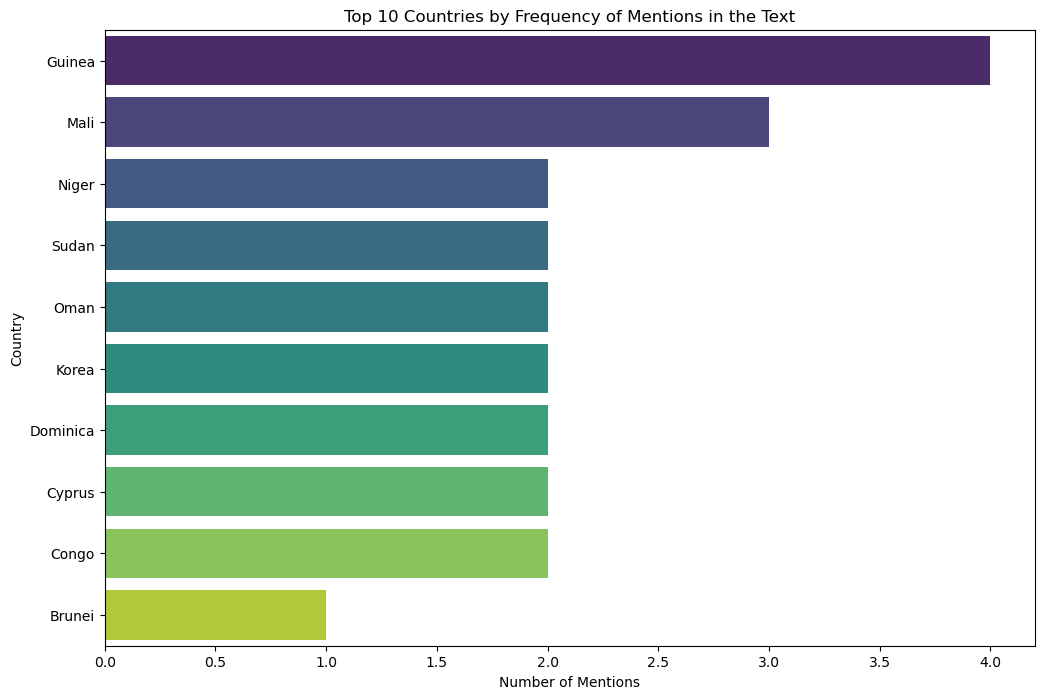

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the top 10 countries by mentions
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_countries, x='Mentions', y='Country', palette='viridis')
plt.title('Top 10 Countries by Frequency of Mentions in the Text')
plt.xlabel('Number of Mentions')
plt.ylabel('Country')
plt.show()


### Findings from the Plot

The plot displays the frequency of the top 10 countries mentioned in the text. Key observations include:

- A few countries are mentioned significantly more often than others, indicating a focus on these countries within the text.
- The disparity between the most and least mentioned countries in the top 10 suggests varying levels of importance or relevance to the text's content.
- This trend may indicate that the text emphasizes certain geographical regions or events associated with these countries.

Understanding these patterns can provide insights into the themes and focus areas of the text.
